Kmeans and knn

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [565]:
dps = pd.read_csv('..\data\s4_dps.csv')
heals = pd.read_csv('..\data\s4_heals.csv')
tanks = pd.read_csv('..\data\s4_tank.csv')

Preprocessing

In [566]:
dps.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
0,Genji,All,2.50,3.45,49.28,18.30,5.06,64,7292,NaN,8.09,NaN,Damage
1,Genji,Bronze,2.37,1.15,44.89,16.33,5.34,70,6572,NaN,8.15,NaN,Damage
2,Genji,Silver,2.53,1.40,47.39,16.91,5.26,69,6777,NaN,8.16,NaN,Damage
3,Genji,Gold,2.50,2.21,48.29,17.63,5.31,68,7044,NaN,8.17,NaN,Damage
4,Genji,Platinum,2.51,3.53,49.10,18.32,5.21,66,7291,NaN,8.14,NaN,Damage


In [567]:
#finding different class labels 
np.unique(dps['Skill Tier'])

array(['All', 'Bronze', 'Diamond', 'Gold', 'Grandmaster', 'Master',
       'Platinum', 'Silver'], dtype=object)

In [568]:
dps.shape

(136, 13)

In [569]:
dps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hero                     136 non-null    object 
 1   Skill Tier               136 non-null    object 
 2   KDA Ratio                136 non-null    float64
 3   Pick Rate, %             136 non-null    float64
 4   Win Rate, %              136 non-null    float64
 5   Eliminations / 10min     136 non-null    float64
 6   Objective Kills / 10min  136 non-null    float64
 7   Objective Time / 10min   136 non-null    int64  
 8   Damage / 10min           136 non-null    int64  
 9   Healing / 10min          8 non-null      float64
 10  Deaths / 10min           136 non-null    float64
 11  Scoped Accuracy, %       16 non-null     float64
 12  Role                     136 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 13.9+ KB


In [570]:
dps_test = dps.copy()

In [571]:
np.unique(dps_test['Skill Tier'])

array(['All', 'Bronze', 'Diamond', 'Gold', 'Grandmaster', 'Master',
       'Platinum', 'Silver'], dtype=object)

In [572]:
dps_test.isnull().sum()

Hero                         0
Skill Tier                   0
KDA Ratio                    0
Pick Rate, %                 0
Win Rate, %                  0
Eliminations / 10min         0
Objective Kills / 10min      0
Objective Time / 10min       0
Damage / 10min               0
Healing / 10min            128
Deaths / 10min               0
Scoped Accuracy, %         120
Role                         0
dtype: int64

In [ ]:
columns_to_drop = ['Scoped Accuracy, %', 'Healing / 10min', 'Role', 'Pick Rate, %']

# Drop the specified columns
dps_test = dps_test.drop(columns=columns_to_drop)

In [573]:
# LabelEncoder for 'Hero' column
hero_encoder = LabelEncoder()
dps_test['Hero'] = hero_encoder.fit_transform(dps_test['Hero'])

# LabelEncoder for 'Role' column
skill_tier_encoder = LabelEncoder()
dps_test['Skill Tier'] = skill_tier_encoder.fit_transform(dps_test['Skill Tier'])

In [575]:
dps_test.head()

,Hero,Skill Tier,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min
0,4,0,2.50,49.28,18.30,5.06,64,7292,8.09
1,4,1,2.37,44.89,16.33,5.34,70,6572,8.15
2,4,7,2.53,47.39,16.91,5.26,69,6777,8.16
3,4,3,2.50,48.29,17.63,5.31,68,7044,8.17
4,4,6,2.51,49.10,18.32,5.21,66,7291,8.14


<Axes: >

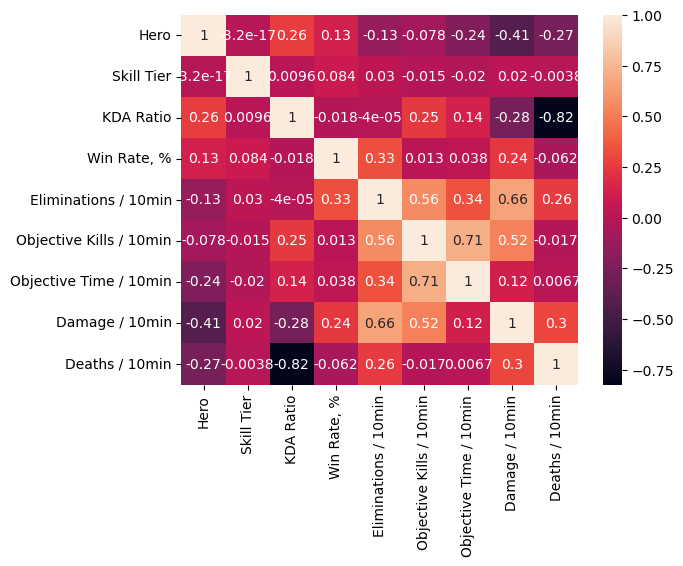

In [576]:
dps_corr = dps_test.corr()

sns.heatmap(dps_corr, annot=True)

In [577]:
dps_test.head()

,Hero,Skill Tier,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min
0,4,0,2.50,49.28,18.30,5.06,64,7292,8.09
1,4,1,2.37,44.89,16.33,5.34,70,6572,8.15
2,4,7,2.53,47.39,16.91,5.26,69,6777,8.16
3,4,3,2.50,48.29,17.63,5.31,68,7044,8.17
4,4,6,2.51,49.10,18.32,5.21,66,7291,8.14


In [578]:
columns_to_scale = dps_test.iloc[:, 2:]

# Extract the numerical values from the selected rows
data_to_scale = columns_to_scale.select_dtypes(include=['float64', 'int64']).values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected rows
scaled_data = scaler.fit_transform(data_to_scale)





In [579]:
# Convert back to a DataFrame
scaled_dps = pd.DataFrame(scaled_data, columns=columns_to_scale.select_dtypes(include=['float64', 'int64']).columns)

In [580]:
# Replace the original values with the scaled values in the DataFrame
dps_test.iloc[:, 2:] = scaled_dps

In [581]:
scaled_dps = pd.concat([dps_test.iloc[:, :2], scaled_dps], axis=1)


In [582]:
scaled_dps.head()

,Hero,Skill Tier,KDA Ratio,"Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Deaths / 10min
0,4,0,-0.769081,0.748537,0.319700,-1.105581,0.586690,-0.508912,0.411954
1,4,1,-0.975133,-0.664606,-1.006419,-0.872724,0.973082,-1.084713,0.502440
2,4,7,-0.721531,0.140145,-0.615988,-0.939254,0.908684,-0.920770,0.517521
3,4,3,-0.769081,0.429855,-0.131315,-0.897673,0.844285,-0.707244,0.532602
4,4,6,-0.753231,0.690595,0.333163,-0.980836,0.715488,-0.509712,0.487359


In [583]:
scaled_dps.isnull().sum()

Hero                       0
Skill Tier                 0
KDA Ratio                  0
Win Rate, %                0
Eliminations / 10min       0
Objective Kills / 10min    0
Objective Time / 10min     0
Damage / 10min             0
Deaths / 10min             0
dtype: int64

In [584]:
scaled_dps = dps_test.dropna()

In [585]:
scaled_dps.isnull().sum()

Hero                       0
Skill Tier                 0
KDA Ratio                  0
Win Rate, %                0
Eliminations / 10min       0
Objective Kills / 10min    0
Objective Time / 10min     0
Damage / 10min             0
Deaths / 10min             0
dtype: int64

In [597]:
#converting dataframe to np array 
data = scaled_dps.values 

X = data[:, [0] + list(range(2, data.shape[1]))]
Y = data[:, 1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

total_rows = 136

# Calculate the number of rows for the training set (75% of the total)
train_rows = int(0.75 * total_rows)

# Training set
train_x = X[:train_rows, ]
train_y = Y[:train_rows, ]

# Testing set
test_x = X[train_rows:, ]
test_y = Y[train_rows:, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(136, 8)
(136,)
(102, 8)
(102,)
(34, 8)
(34,)


In [607]:
# KNN 

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_x, train_y)

# training predictions
train_preds= knn.predict(train_x)

# testing predictions
test_preds = knn.predict(test_x)

# KNN model accuracy

#training accuracy
print(accuracy_score(train_y, train_preds)*100)
#testing accuracy
print(accuracy_score(test_y, test_preds)*100)

17.647058823529413
23.52941176470588


In [588]:
def optimize_kmeans(X, max_clusters):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()  

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

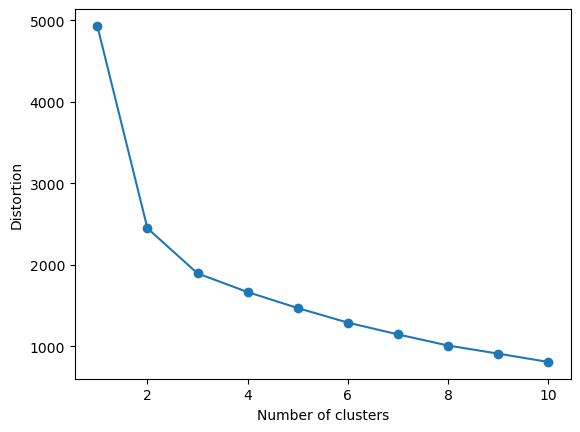

In [589]:
optimize_kmeans(scaled_dps, 10)

In [590]:
#KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rakee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [591]:
#KMeans model accuracy

 

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

12.962962962962962
10.714285714285714
